In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# PM2.5 preparation
# Load CSV
df_csv = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_bu_azizah/co2_satuan.csv')
tp_mean = df_csv.groupby(['longitude', 'latitude'], as_index=False)['co2'].mean()

In [3]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/peta_jatim/kabupaten.shp")

In [4]:
# Convert DataFrame to GeoDataFrame
geometry = gpd.points_from_xy(tp_mean['longitude'], tp_mean['latitude'])
gdf_csv = gpd.GeoDataFrame(tp_mean, geometry=geometry, crs=4326)


<Axes: >

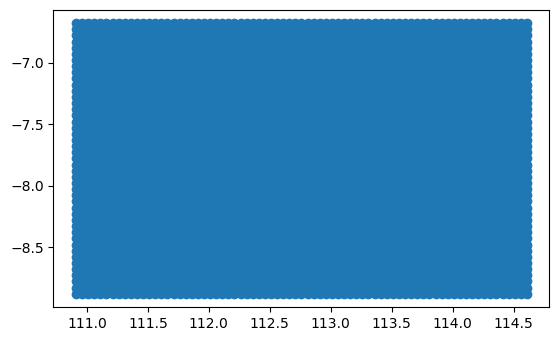

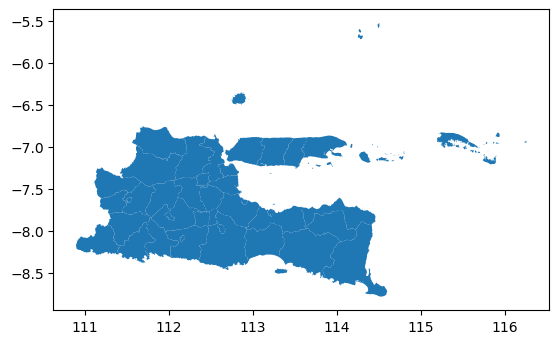

In [5]:
gdf_csv.plot()
gdf_shapefile.plot()

In [6]:
# spatial join
result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')
result_pop = result[['longitude', 'latitude', 'co2', 'IDKABKOTA', 'geometry']]

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_4282/2235399359.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  result = gpd.sjoin(gdf_csv, gdf_shapefile, how='inner', predicate='intersects')


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1532 entries, 14 to 3289
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   longitude  1532 non-null   float64 
 1   latitude   1532 non-null   float64 
 2   co2        1532 non-null   float64 
 3   IDKABKOTA  1532 non-null   object  
 4   geometry   1532 non-null   geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 71.8+ KB


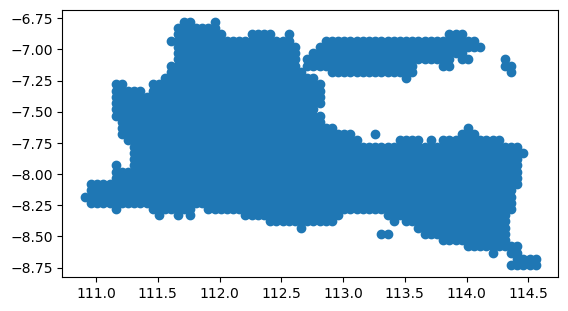

In [7]:
result_pop.plot()
result_pop.info()

In [8]:

dissolved_result = result_pop.dissolve(by='IDKABKOTA', aggfunc='mean')
dissolved_result.head()

,geometry,longitude,latitude,co2
IDKABKOTA,,,,
BANGKALAN,"MULTIPOINT ((112.71000 -7.13000), (112.71000 -...",112.924106,-7.049231,630.919927
BANYUWANGI,"MULTIPOINT ((113.86000 -8.48000), (113.86000 -...",114.205913,-8.355909,632.206831
BATU,"MULTIPOINT ((112.51000 -7.93000), (112.51000 -...",112.526670,-7.846667,644.293602
BOJONEGORO,"MULTIPOINT ((111.46000 -7.33000), (111.46000 -...",111.811355,-7.261757,653.358827
BONDOWOSO,"MULTIPOINT ((113.71000 -7.98000), (113.71000 -...",113.963004,-7.942000,640.992972


In [9]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_4282/4084503087.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')


<Axes: >

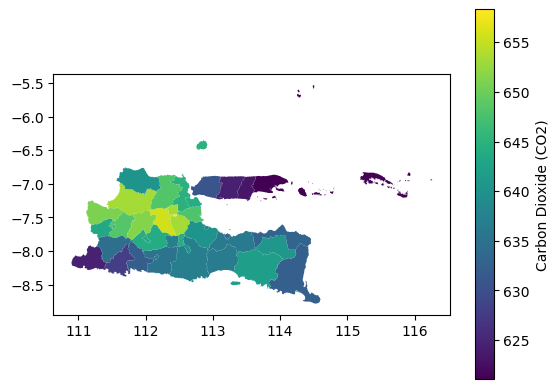

In [10]:
polygon_result.plot(column="co2", legend=True, legend_kwds={"label": "Carbon Dioxide (CO2)"})

In [11]:
polygon_result.to_file('polygon_co2_result.shp')

/var/folders/81/vqbnjx_x20zdr2m7bscdvp5r0000gn/T/ipykernel_4282/540746906.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  polygon_result.to_file('polygon_co2_result.shp')
